# Project 1
## Author: Jerrin C. Redmon
## CS-430
### October 20, 2022
### Version 1

### Description
Data analysis of data found on Kaggle and using machine learning techniques to find the best model.
### Data
Stars.csv
-Link:https://www.kaggle.com/datasets/brsdincer/star-type-classification

#### Data Info

Star Type Classification

For comparing all models of ML
It can be used for prediction

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

    Red Dwarf - 0
    Brown Dwarf - 1
    White Dwarf - 2
    Main Sequence - 3
    Super Giants - 4
    Hyper Giants - 5

MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

## Beginning of Data Analysis

##### Imports



In [70]:
import numpy as np #linear algebra
import pandas as pd #Data manipulation
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization

##### Importing Dataset

In [71]:
stars = pd.read_csv('/content/Stars.csv')

##### Data Observation

In [72]:
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [73]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [74]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


##### Visualization

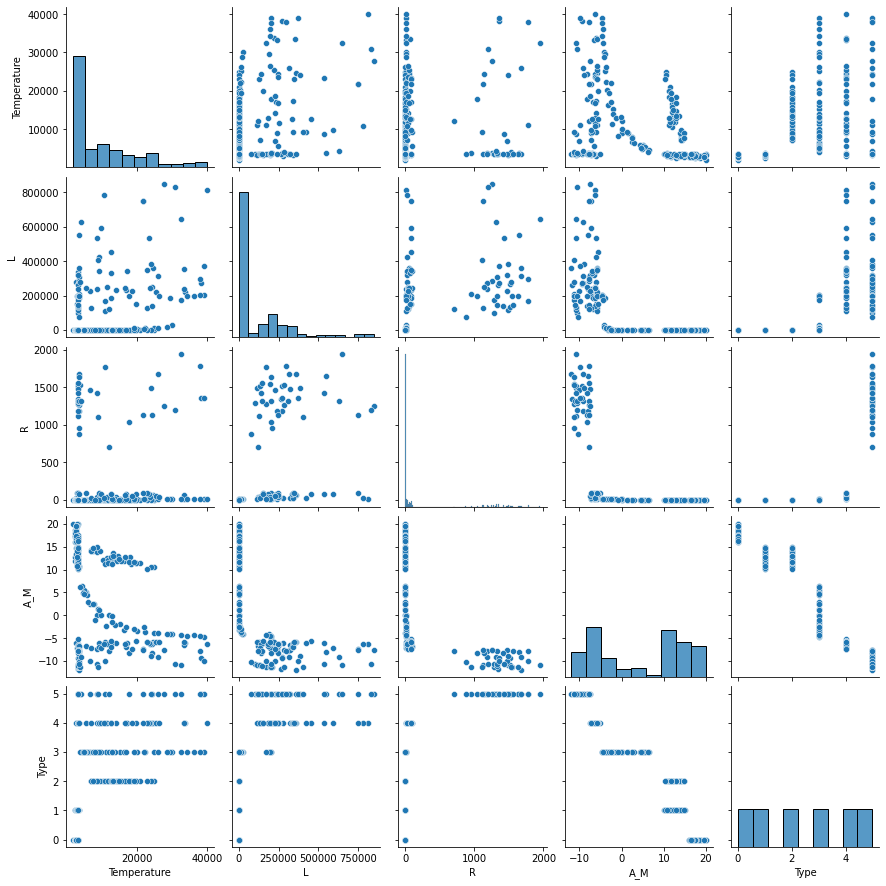

In [75]:
sns.pairplot(stars)

## Data Cleaning

In [76]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

#### Dummies

In [77]:
stars = pd.get_dummies(stars[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']], drop_first = True)

In [78]:
stars.head()

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               240 non-null    int64  
 1   L                         240 non-null    float64
 2   R                         240 non-null    float64
 3   A_M                       240 non-null    float64
 4   Type                      240 non-null    int64  
 5   Color_Blue White          240 non-null    uint8  
 6   Color_Blue white          240 non-null    uint8  
 7   Color_Blue-White          240 non-null    uint8  
 8   Color_Blue-white          240 non-null    uint8  
 9   Color_Orange              240 non-null    uint8  
 10  Color_Orange-Red          240 non-null    uint8  
 11  Color_Pale yellow orange  240 non-null    uint8  
 12  Color_Red                 240 non-null    uint8  
 13  Color_White               240 non-null    uint8  
 14  Color_Whit

## Data Prep for ML techniques

##### Splitting The Dataset

In [106]:
X = stars.drop(['Type'], axis = 1)
y = stars['Type']

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2, random_state = 42)

#### Scaling Data

In [108]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
#sc_y = StandardScaler()

In [109]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.transform(y_test)

#### Encoder

In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


## Machine Learning Classification Technique Testing

##### Imports

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [112]:
model_params = {'SVC':{'model':SVC(gamma = 'auto'),
                       'params':{ 'C':[.1,1,10,20,100],
                                 'kernel':['rbf','linear','poly'],
                                 
     }
  },
  
  'Logistic_Regession':{
      'model':LogisticRegression(),
      'params':{
          'penalty':['l1','l2','elasticnet','none'],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']          
      }
  },
  'Random_Forest':{
      'model':RandomForestClassifier(),
      'params':{
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,3,4,5]
      }
  },
  'Decision_Tree':{
      'model':DecisionTreeClassifier(),
      'params':{
          'criterion':['gini','entropy'],
          'max_depth':[2,3,4,5]
      }
  }
}

In [113]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name, model_parameter in model_params.items():
  clf = RandomizedSearchCV(model_parameter['model'],model_parameter['params'], cv = 5,
                           return_train_score = False, n_iter = 15)
  clf.fit(X_train,y_train)
  scores.append({
    'model':model_name,
    'best_score':clf.best_score_,
    'best_params':clf.best_params_

})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [114]:
scores

[{'model': 'SVC',
  'best_score': 0.989608636977058,
  'best_params': {'kernel': 'linear', 'C': 10}},
 {'model': 'Logistic_Regession',
  'best_score': 0.9842105263157895,
  'best_params': {'solver': 'lbfgs', 'penalty': 'l2'}},
 {'model': 'Random_Forest',
  'best_score': 1.0,
  'best_params': {'max_depth': 5, 'criterion': 'gini'}},
 {'model': 'Decision_Tree',
  'best_score': 1.0,
  'best_params': {'max_depth': 5, 'criterion': 'gini'}}]

#### Classification Report

In [117]:
RFC = RandomForestClassifier(criterion = 'gini', max_depth = 5, random_state = 0)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [118]:
RFC.score(X_test,y_test)

1.0

In [119]:
y_pred = RFC.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [124]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [123]:
df.head()

,model,best_score,best_params
0,SVC,0.989609,"{'kernel': 'linear', 'C': 10}"
1,Logistic_Regession,0.984211,"{'solver': 'lbfgs', 'penalty': 'l2'}"
2,Random_Forest,1.000000,"{'max_depth': 5, 'criterion': 'gini'}"
3,Decision_Tree,1.000000,"{'max_depth': 5, 'criterion': 'gini'}"
